# Image Classification using CNN

CNN stands for Convolutionary Neural Network. Convolution stands for a pointwise multiplication of 2 functions to produce a third function. One of the functions here happens to be the image pixel matrix and another is the filter which shall be imposed upon the image. The dot product of the 2 function matrices causes the creation of an ‘Activation Map’ or a ‘Feature Map’.

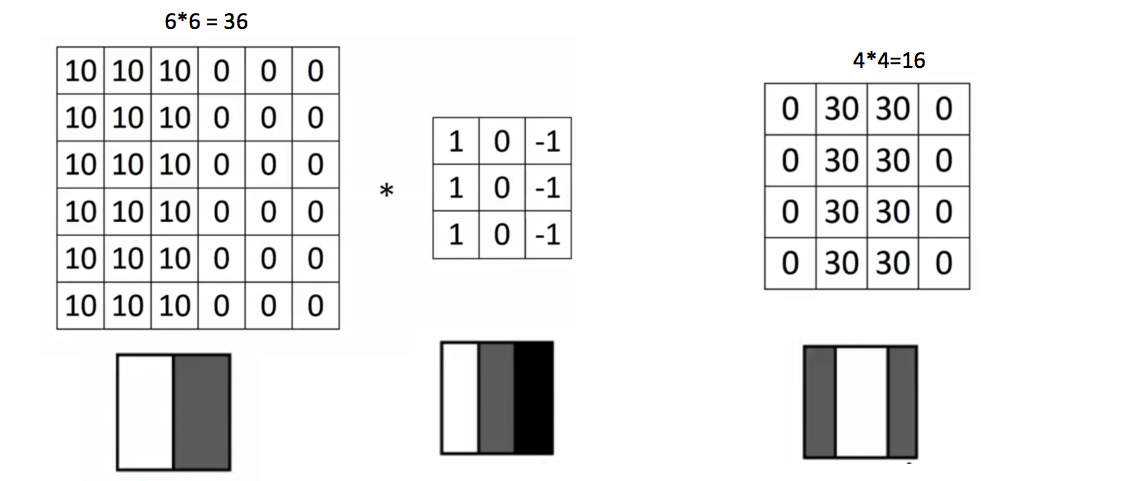

CNN has the ability to learn hierarchical features like edges, textures and shapes enabling accurate object detection. It is also capable of extracting meaningful spatial features from images. CNN consists of various layers:

**Input Layer:**

This layer takes raw images as input and are represented in the form of matrices of pixel values. Dimensions of input layers correspond to size of input images, i.e., height, width and color channels. 

**Convolution Layer:**

This layer is responsible for feature extraction. It consists of features, also known as kernels, which are convolved with the raw image inputs to capture relevant patterns and features. These layers learn to detect important edges, textures, shapes, layers and features. It provides with an output in the form of feature maps.

**Pooling Layers:**

This layer is responsible for reducing the spatial dimensions of the feature maps created by the convolution layer. It is responsible for performing down-sampling operations to retain the most salient features and information while discarding the unnecessary details. This helps in achieving translational invariance and reduced computational complexity.

- **Translational Invariance:** Property of a system or function that remains unchanged when it undergoes a translation (shift) in some specific direction. Eg.: • A translation-invariant system can recognize an object (e.g., a face) regardless of its position within the image.

**Fully Connected Layers:**

The output of the last pooling layers is flattened and connected to one or more fully connected layers. These fully connected layers act as **Traditional Neural Network Layers** and help in classification of the features extracted from the image. The role of the fully connected layers is to learn complex relationships between features and provide output in the form of class probabilities and predictions.

**Output Layer:**

This is the final layer of CNN and consists of neurons equal to the number of distinct classes in the classification task. The output layer provides each class’s classification probabilities or predictions, indicating the likelihood of the input image belonging to a particular class.

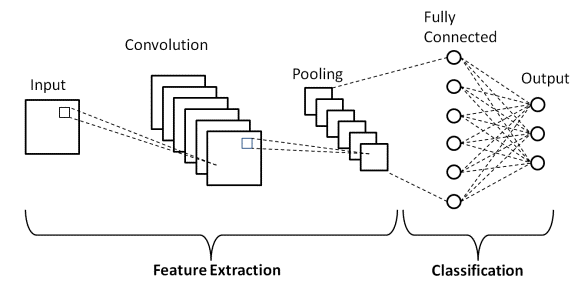

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

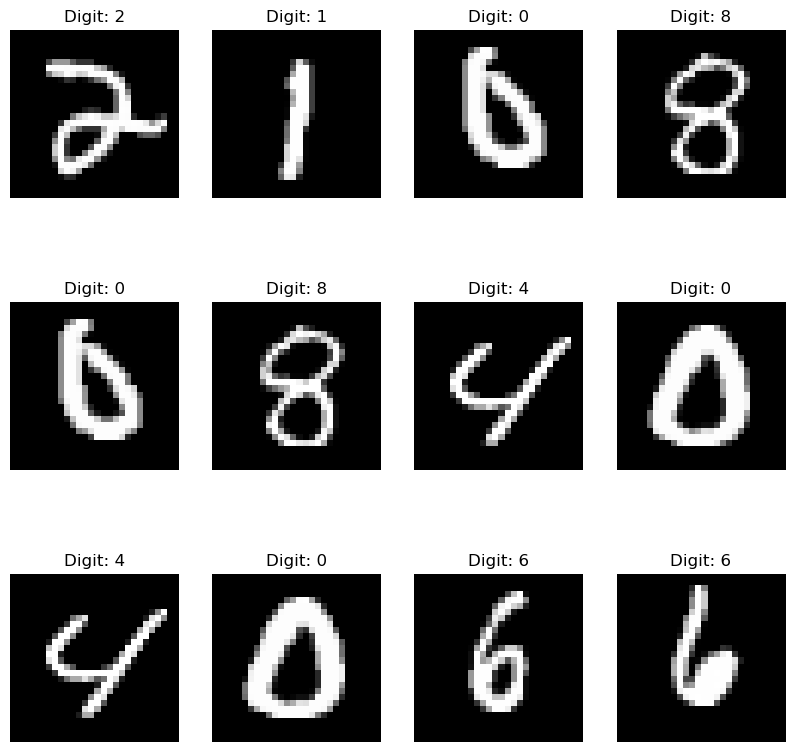

In [6]:
import random
n=7
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
indices = random.sample(range(len(x_train)), 12)
images = x_train[indices]
labels = y_train[indices]
for i in range(3):
    for j in range(4):
        index = i * 2 + j
        image = images[index].reshape((28, 28))  # Reshape the image to 28x28
        axs[i, j].imshow(image, cmap='gray')  # Plot the image
        axs[i, j].set_title(f"Digit: {labels[index]}")  # Add title with label
        axs[i, j].axis('off')  # Hide axis ticks and labels

# print(y_train[n])

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Hence, we can see here that the image size is (28x28) and the training dataset consists of 60,000 images to train the model. The testing dataset consists of 10,000 images of Handwritten digits.

To train the neural network with the image dataset, we require a 3 dimensional image and all the images given in the dataset are of 2 dimensions only. Hence, we use the reshape property to change the dimension of all the images to 3 dimensional images, i.e., (28x28x1)

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

## Creating the Model:

The `model = Sequential()` is used to simply define a private Convolutionary Neural Network where various layers can be added by using the `add()` method. It provides us with basic features like:
1) Accessing individual layers using indexing
2) Compiling entire model for training
3) Evaluating Model's Performance

1) Conv2D():
    It stands for Convolutional 2D layer. It extracts the spatial patterns and features from the images and outputs a feature map which consists of extracted features from the image.
2) MaxPooling2D():
    It represents the Pooling Layer and reduce the dimensionality of data while retaining the spatial features extracted by the Convolutional layer. In other words, it performs the downsampling operation.
3) Dropout():
    It is used to solve the problem of over fitting where the model performs well on training data but under-performs on the testing data leading to lower accuracies. It is a regularization technique.
4) Flatten():
    It reshapes the multi-dimensional input into a single-dimensional vector. This allows the data to be fed into fully-connected layers, which require 1D inputs.
5) Dense():
    It represents the Fully Connected Layer and connects each neuron in one layer to each neuron in the next layer, performs linear transformations based on weights and biases associated to each neuron and transforms the data's dimensionality to increase its feature complexity and adapt to the desired output.

In [10]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # compile() --> sets up important features like optimizer, losss function and metrics

## Training the Model

The `epochs` value is used in Deep Learning CNN models wherein it denotes the number of times the entire dataset of images, i.e. `mnist dataset` is being passed throughout the entire model. We are also trying to print the training loss(loss) and validation_loss(val_loss), training accuracy(accuracy) and validation_accuracy(val_accuracy) here. The conditions for finding if the model is over-fitting or under-fitting is as follows:

1) If validation_loss >> training loss ; then the model is **Overfitting**.
1) If validation_loss > training_loss ; then the model is **slightly Overfitting**.
1) If validation_loss < training_loss ; then the model is **slightly Underfitting**.
1) If validation_loss << training_loss ; then the model is **Underfitting**.

In [20]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model.save('mnist.h5')
print("Saving the model as 'mnist.h5'")

Epoch 1/50
469/469 [==============================] - 40s 84ms/step - loss: 2.2848 - accuracy: 0.1428 - val_loss: 2.2440 - val_accuracy: 0.4081
Epoch 2/50
469/469 [==============================] - 42s 90ms/step - loss: 2.2174 - accuracy: 0.2877 - val_loss: 2.1600 - val_accuracy: 0.5720
Epoch 3/50
469/469 [==============================] - 40s 86ms/step - loss: 2.1257 - accuracy: 0.4144 - val_loss: 2.0393 - val_accuracy: 0.6350
Epoch 4/50
469/469 [==============================] - 42s 89ms/step - loss: 1.9943 - accuracy: 0.5066 - val_loss: 1.8627 - val_accuracy: 0.6915
Epoch 5/50
469/469 [==============================] - 41s 88ms/step - loss: 1.8087 - accuracy: 0.5760 - val_loss: 1.6268 - val_accuracy: 0.7440
Epoch 6/50
469/469 [==============================] - 44s 94ms/step - loss: 1.5843 - accuracy: 0.6271 - val_loss: 1.3629 - val_accuracy: 0.7729
Epoch 7/50
469/469 [==============================] - 42s 90ms/step - loss: 1.3633 - accuracy: 0.6576 - val_loss: 1.1247 - val_accuracy:

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluating the Model: mnist.h5

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss = ", score[0])
print("Test Accuracy = ", score[1])

Test Loss =  0.26294204592704773
Test Accuracy =  0.9228000044822693


## Model with epoch=20:

In [12]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model1 = Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

In [13]:
hist = model1.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model1.save('mnist_epoch20.h5')
print("Saving the model as 'mnist_epoch20.h5'")

Epoch 1/20
469/469 [==============================] - 34s 70ms/step - loss: 2.2701 - accuracy: 0.1794 - val_loss: 2.2152 - val_accuracy: 0.4146
Epoch 2/20
469/469 [==============================] - 34s 73ms/step - loss: 2.1783 - accuracy: 0.3368 - val_loss: 2.1025 - val_accuracy: 0.5621
Epoch 3/20
469/469 [==============================] - 34s 72ms/step - loss: 2.0577 - accuracy: 0.4613 - val_loss: 1.9460 - val_accuracy: 0.6575
Epoch 4/20
469/469 [==============================] - 34s 73ms/step - loss: 1.8888 - accuracy: 0.5469 - val_loss: 1.7299 - val_accuracy: 0.7228
Epoch 5/20
469/469 [==============================] - 35s 75ms/step - loss: 1.6746 - accuracy: 0.6055 - val_loss: 1.4666 - val_accuracy: 0.7682
Epoch 6/20
469/469 [==============================] - 35s 75ms/step - loss: 1.4405 - accuracy: 0.6482 - val_loss: 1.2056 - val_accuracy: 0.7970
Epoch 7/20
469/469 [==============================] - 33s 71ms/step - loss: 1.2296 - accuracy: 0.6838 - val_loss: 0.9923 - val_accuracy:

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## mnist_epoch20 model evaluation:

In [14]:
score = model1.evaluate(x_test, y_test, verbose=0)
print("Test Loss = ", score[0])
print("Test Accuracy = ", score[1])

Test Loss =  0.38610392808914185
Test Accuracy =  0.8970000147819519


## Model with epoch=70:

In [17]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model2 = Sequential()
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

In [18]:
hist = model2.fit(x_train, y_train, batch_size=batch_size, epochs=70, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model2.save('mnist_epoch70.h5')
print("Saving the model as 'mnist_epoch70.h5'")

Epoch 1/70
469/469 [==============================] - 32s 66ms/step - loss: 2.2795 - accuracy: 0.1452 - val_loss: 2.2324 - val_accuracy: 0.3644
Epoch 2/70
469/469 [==============================] - 34s 73ms/step - loss: 2.1985 - accuracy: 0.3070 - val_loss: 2.1321 - val_accuracy: 0.6486
Epoch 3/70
469/469 [==============================] - 34s 73ms/step - loss: 2.0900 - accuracy: 0.4597 - val_loss: 1.9910 - val_accuracy: 0.7283
Epoch 4/70
469/469 [==============================] - 33s 71ms/step - loss: 1.9379 - accuracy: 0.5531 - val_loss: 1.7903 - val_accuracy: 0.7618
Epoch 5/70
469/469 [==============================] - 33s 71ms/step - loss: 1.7294 - accuracy: 0.6196 - val_loss: 1.5324 - val_accuracy: 0.7818
Epoch 6/70
469/469 [==============================] - 33s 71ms/step - loss: 1.4907 - accuracy: 0.6618 - val_loss: 1.2593 - val_accuracy: 0.8019
Epoch 7/70
469/469 [==============================] - 34s 71ms/step - loss: 1.2697 - accuracy: 0.6860 - val_loss: 1.0274 - val_accuracy:

## mnist_epoch70 model evaluation:

In [19]:
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test Loss = ", score[0])
print("Test Accuracy = ", score[1])

Test Loss =  0.21564091742038727
Test Accuracy =  0.9362000226974487


## Trying to change the make-up of the layers of CNN in order to improve the accuracy with (4x4) Conv2D layer:

In [11]:
model4 = Sequential()
model4.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(64, (4,4), activation='relu'))
model4.add(MaxPooling2D((2,2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
model4.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

### Model on (4x4) kernel selection with 20 epochs:

In [19]:
hist = model4.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model4.save('new_mnist(4x4)_epoch20.h5')
print("Saving the model as 'new_mnist(4x4)_epoch20.h5'")

Epoch 1/20
469/469 [==============================] - 26s 56ms/step - loss: 2.2791 - accuracy: 0.1304 - val_loss: 2.2563 - val_accuracy: 0.1557
Epoch 2/20
469/469 [==============================] - 27s 57ms/step - loss: 2.2560 - accuracy: 0.1697 - val_loss: 2.2297 - val_accuracy: 0.2860
Epoch 3/20
469/469 [==============================] - 27s 57ms/step - loss: 2.2316 - accuracy: 0.2127 - val_loss: 2.2007 - val_accuracy: 0.4208
Epoch 4/20
469/469 [==============================] - 27s 57ms/step - loss: 2.2037 - accuracy: 0.2620 - val_loss: 2.1679 - val_accuracy: 0.5276
Epoch 5/20
469/469 [==============================] - 27s 57ms/step - loss: 2.1759 - accuracy: 0.3002 - val_loss: 2.1311 - val_accuracy: 0.5914
Epoch 6/20
469/469 [==============================] - 26s 56ms/step - loss: 2.1400 - accuracy: 0.3469 - val_loss: 2.0889 - val_accuracy: 0.6351
Epoch 7/20
469/469 [==============================] - 26s 56ms/step - loss: 2.1014 - accuracy: 0.3861 - val_loss: 2.0407 - val_accuracy:

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model on (4x4) kernel selection with 50 epochs:

In [23]:
hist = model4.fit(x_train, y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model4.save('new_mnist(4x4)_epoch50.h5')
print("Saving the model as 'new_mnist(4x4)_epoch50.h5'")

Epoch 1/50
469/469 [==============================] - 27s 57ms/step - loss: 1.1712 - accuracy: 0.6688 - val_loss: 0.9173 - val_accuracy: 0.8374
Epoch 2/50
469/469 [==============================] - 27s 57ms/step - loss: 1.1173 - accuracy: 0.6799 - val_loss: 0.8592 - val_accuracy: 0.8414
Epoch 3/50
469/469 [==============================] - 27s 57ms/step - loss: 1.0675 - accuracy: 0.6898 - val_loss: 0.8079 - val_accuracy: 0.8453
Epoch 4/50
469/469 [==============================] - 27s 57ms/step - loss: 1.0267 - accuracy: 0.6966 - val_loss: 0.7623 - val_accuracy: 0.8496
Epoch 5/50
469/469 [==============================] - 27s 57ms/step - loss: 0.9850 - accuracy: 0.7110 - val_loss: 0.7212 - val_accuracy: 0.8543
Epoch 6/50
469/469 [==============================] - 27s 57ms/step - loss: 0.9509 - accuracy: 0.7160 - val_loss: 0.6845 - val_accuracy: 0.8575
Epoch 7/50
469/469 [==============================] - 27s 57ms/step - loss: 0.9173 - accuracy: 0.7253 - val_loss: 0.6520 - val_accuracy:

### Model on (4x4) kernel selection with 70 epochs:

In [33]:
hist = model4.fit(x_train, y_train, batch_size=batch_size, epochs=70, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model4.save('new_mnist(4x4)_epoch70.h5')
print("Saving the model as 'new_mnist(4x4)_epoch70.h5'")

Epoch 1/70
469/469 [==============================] - 27s 58ms/step - loss: 0.4022 - accuracy: 0.8783 - val_loss: 0.2504 - val_accuracy: 0.9330
Epoch 2/70
469/469 [==============================] - 27s 57ms/step - loss: 0.3969 - accuracy: 0.8807 - val_loss: 0.2475 - val_accuracy: 0.9338
Epoch 3/70
469/469 [==============================] - 27s 57ms/step - loss: 0.3949 - accuracy: 0.8815 - val_loss: 0.2451 - val_accuracy: 0.9336
Epoch 4/70
469/469 [==============================] - 27s 57ms/step - loss: 0.3904 - accuracy: 0.8825 - val_loss: 0.2425 - val_accuracy: 0.9343
Epoch 5/70
469/469 [==============================] - 27s 57ms/step - loss: 0.3857 - accuracy: 0.8830 - val_loss: 0.2398 - val_accuracy: 0.9352
Epoch 6/70
469/469 [==============================] - 27s 57ms/step - loss: 0.3810 - accuracy: 0.8856 - val_loss: 0.2374 - val_accuracy: 0.9357
Epoch 7/70
469/469 [==============================] - 27s 57ms/step - loss: 0.3779 - accuracy: 0.8869 - val_loss: 0.2350 - val_accuracy:

## Trying to change the make-up of the layers of CNN in order to improve the accuracy with (2x2) Conv2D layer:

In [20]:
model5 = Sequential()
model5.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(64, (2,2), activation='relu'))
model5.add(MaxPooling2D((2,2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
model5.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

### Model on (2x2) kernel selection with 20 epochs:

In [21]:
hist = model5.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model5.save('new_mnist(2x2)_epoch20.h5')
print("Saving the model as 'new_mnist(2x2)_epoch20.h5'")

Epoch 1/20
469/469 [==============================] - 25s 48ms/step - loss: 2.2878 - accuracy: 0.1291 - val_loss: 2.2675 - val_accuracy: 0.1753
Epoch 2/20
469/469 [==============================] - 21s 45ms/step - loss: 2.2648 - accuracy: 0.1664 - val_loss: 2.2411 - val_accuracy: 0.2823
Epoch 3/20
469/469 [==============================] - 22s 47ms/step - loss: 2.2419 - accuracy: 0.2077 - val_loss: 2.2137 - val_accuracy: 0.3741
Epoch 4/20
469/469 [==============================] - 22s 46ms/step - loss: 2.2162 - accuracy: 0.2502 - val_loss: 2.1841 - val_accuracy: 0.4532
Epoch 5/20
469/469 [==============================] - 22s 47ms/step - loss: 2.1898 - accuracy: 0.2911 - val_loss: 2.1517 - val_accuracy: 0.5184
Epoch 6/20
469/469 [==============================] - 22s 47ms/step - loss: 2.1584 - accuracy: 0.3338 - val_loss: 2.1155 - val_accuracy: 0.5774
Epoch 7/20
469/469 [==============================] - 22s 47ms/step - loss: 2.1259 - accuracy: 0.3667 - val_loss: 2.0754 - val_accuracy:

### Model on (2x2) kernel selection with 50 epochs:

In [22]:
hist = model5.fit(x_train, y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model5.save('new_mnist(2x2)_epoch50.h5')
print("Saving the model as 'new_mnist(2x2)_epoch50.h5'")

Epoch 1/50
469/469 [==============================] - 22s 47ms/step - loss: 1.3125 - accuracy: 0.6260 - val_loss: 1.1068 - val_accuracy: 0.7859
Epoch 2/50
469/469 [==============================] - 21s 45ms/step - loss: 1.2673 - accuracy: 0.6367 - val_loss: 1.0483 - val_accuracy: 0.7919
Epoch 3/50
469/469 [==============================] - 22s 47ms/step - loss: 1.2154 - accuracy: 0.6439 - val_loss: 0.9950 - val_accuracy: 0.7969
Epoch 4/50
469/469 [==============================] - 22s 47ms/step - loss: 1.1751 - accuracy: 0.6525 - val_loss: 0.9470 - val_accuracy: 0.8012
Epoch 5/50
469/469 [==============================] - 22s 46ms/step - loss: 1.1376 - accuracy: 0.6605 - val_loss: 0.9038 - val_accuracy: 0.8053
Epoch 6/50
469/469 [==============================] - 22s 46ms/step - loss: 1.1024 - accuracy: 0.6690 - val_loss: 0.8651 - val_accuracy: 0.8092
Epoch 7/50
469/469 [==============================] - 22s 47ms/step - loss: 1.0676 - accuracy: 0.6757 - val_loss: 0.8299 - val_accuracy:

### Model on (2x2) kernel selection with 70 epochs:

In [34]:
hist = model5.fit(x_train, y_train, batch_size=batch_size, epochs=70, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model5.save('new_mnist(2x2)_epoch70.h5')
print("Saving the model as 'new_mnist(2x2)_epoch70.h5'")

Epoch 1/70
469/469 [==============================] - 16s 35ms/step - loss: 0.5583 - accuracy: 0.8234 - val_loss: 0.3752 - val_accuracy: 0.8984
Epoch 2/70
469/469 [==============================] - 16s 35ms/step - loss: 0.5543 - accuracy: 0.8270 - val_loss: 0.3716 - val_accuracy: 0.8991
Epoch 3/70
469/469 [==============================] - 17s 35ms/step - loss: 0.5535 - accuracy: 0.8277 - val_loss: 0.3683 - val_accuracy: 0.8999
Epoch 4/70
469/469 [==============================] - 14s 31ms/step - loss: 0.5474 - accuracy: 0.8274 - val_loss: 0.3651 - val_accuracy: 0.9005
Epoch 5/70
469/469 [==============================] - 9s 19ms/step - loss: 0.5439 - accuracy: 0.8289 - val_loss: 0.3617 - val_accuracy: 0.9018
Epoch 6/70
469/469 [==============================] - 9s 19ms/step - loss: 0.5377 - accuracy: 0.8331 - val_loss: 0.3585 - val_accuracy: 0.9023
Epoch 7/70
469/469 [==============================] - 10s 20ms/step - loss: 0.5328 - accuracy: 0.8346 - val_loss: 0.3553 - val_accuracy: 0

### (4x4) Kernel architecture with Adam optimizer for 10 epochs

In [18]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model7 = Sequential()
model7.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Conv2D(64, (4,4), activation='relu'))
model7.add(MaxPooling2D((2,2)))
model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(10, activation='softmax'))
model7.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

In [19]:
hist = model7.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model4.save('new_mnist(4x4)_epoch10_compile_changes.h5')
print("Saving the model as 'new_mnist(4x4)_epoch10_compile_changes.h5'")

Epoch 1/10
469/469 [==============================] - 30s 57ms/step - loss: 0.2403 - accuracy: 0.9244 - val_loss: 0.0501 - val_accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0343 - val_accuracy: 0.9881
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0252 - val_accuracy: 0.9911
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0236 - val_accuracy: 0.9924
Epoch 5/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0230 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0221 - val_accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0224 - val_accuracy:

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### (4x4) Kernel architecture with Adam optimizer for 8 epochs

In [20]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model8 = Sequential()
model8.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model8.add(MaxPooling2D(pool_size=(2,2)))
model8.add(Conv2D(64, (4,4), activation='relu'))
model8.add(MaxPooling2D((2,2)))
model8.add(Dropout(0.25))
model8.add(Flatten())
model8.add(Dense(256, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(10, activation='softmax'))
model8.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

In [22]:
hist = model8.fit(x_train, y_train, batch_size=batch_size, epochs=8, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model4.save('new_mnist(4x4)_epoch8_compile_changes_optimum.h5')
print("Saving the model as 'new_mnist(4x4)_epoch8_compile_changes_optimum.h5'")

Epoch 1/8
469/469 [==============================] - 30s 57ms/step - loss: 0.2414 - accuracy: 0.9260 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 2/8
469/469 [==============================] - 26s 56ms/step - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.0407 - val_accuracy: 0.9865
Epoch 3/8
469/469 [==============================] - 26s 55ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0283 - val_accuracy: 0.9898
Epoch 4/8
469/469 [==============================] - 26s 56ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0265 - val_accuracy: 0.9909
Epoch 5/8
469/469 [==============================] - 26s 56ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 6/8
469/469 [==============================] - 27s 56ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0213 - val_accuracy: 0.9926
Epoch 7/8
469/469 [==============================] - 27s 56ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0241 - val_accuracy: 0.9920

### (2x2) Kernel architecture with Adam optimizer for 8 epochs

In [11]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model10 = Sequential()
model10.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model10.add(MaxPooling2D(pool_size=(2,2)))
model10.add(Conv2D(64, (2,2), activation='relu'))
model10.add(MaxPooling2D((2,2)))
model10.add(Dropout(0.25))
model10.add(Flatten())
model10.add(Dense(256, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(10, activation='softmax'))
model10.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

In [13]:
hist = model10.fit(x_train, y_train, batch_size=batch_size, epochs=8, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model10.save('new_mnist(2x2)_epoch8_compile_changes_optimum.h5')
print("Saving the model as 'new_mnist(2x2)_epoch8_compile_changes_optimum.h5'")

Epoch 1/8
469/469 [==============================] - 9s 17ms/step - loss: 0.2574 - accuracy: 0.9193 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 2/8
469/469 [==============================] - 9s 20ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.0358 - val_accuracy: 0.9877
Epoch 3/8
469/469 [==============================] - 9s 20ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 4/8
469/469 [==============================] - 9s 20ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 5/8
469/469 [==============================] - 9s 20ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 6/8
469/469 [==============================] - 9s 20ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 7/8
469/469 [==============================] - 9s 20ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0295 - val_accuracy: 0.9909
Epoch 

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### (2x2) Kernel architecture with Adam optimizer for 10 epochs

In [14]:
batch_size = 128
num_classes = 10
epochs = 50
input_shape = (28, 28, 1)
model11 = Sequential()
model11.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model11.add(MaxPooling2D(pool_size=(2,2)))
model11.add(Conv2D(64, (2,2), activation='relu'))
model11.add(MaxPooling2D((2,2)))
model11.add(Dropout(0.25))
model11.add(Flatten())
model11.add(Dense(256, activation='relu'))
model11.add(Dropout(0.5))
model11.add(Dense(10, activation='softmax'))
model11.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy']) # compile() --> sets up important features like optimizer, loss function and metrics

In [15]:
hist = model11.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model11.save('new_mnist(2x2)_epoch10_compile_changes.h5')
print("Saving the model as 'new_mnist(2x2)_epoch10_compile_changes_optimum.h5'")

Epoch 1/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2747 - accuracy: 0.9153 - val_loss: 0.0580 - val_accuracy: 0.9825
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0827 - accuracy: 0.9746 - val_loss: 0.0439 - val_accuracy: 0.9852
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0270 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0250 - val_accuracy: 0

Hence we may come to a conclusion that we have trained various models with various `epoch` values wherein the 'new_mnist(4x4)_epoch70' model was the best model performing with an accuracy of 95.64% accuracy. Here the (4x4) represents the kernel size for the second Convolutional Layer as one of the options whereas the (2x2) happens to be the size of filter/kernel size as the second option.

1) 'new_mnist(4x4)_epoch20' --> 83.18%
2) 'new_mnist(4x4)_epoch50' --> 93.19%
3) 'new_mnist(4x4)_epoch70' --> 95.64% (Highest) --> Feature map size = (5x5x64)
4) 'new_mnist(2x2)_epoch20' --> 77.87%
5) 'new_mnist(2x2)_epoch50' --> 89.81%
6) 'new_mnist(2x2)_epoch70' --> 93.14% --> Feature map size = (6x6x64)

On changing the optimizer to `adam` optimizer of the model, the accuracy has increased from maximum testing accuracy being 95.64% in the previous models to 99.33% accuracy in the new model

1) 'new_mnist(2x2)_epoch10_compile_changes' --> 99.24%
2) 'new_mnist(2x2)_epoch8_compile_changes_optimum' --> 99.15%
3) 'new_mnist(4x4)_epoch10_compile_changes' --> 99.20%
4) 'new_mnist(4x4)_epoch8_compile_changes_optimum' --> 99.33% (Highest) --> Feature map size = (5x5x64)